###Frame the dataset

In [237]:
!pip install missingno

In [238]:
!wget https://www.dropbox.com/s/7y4sxvpg570bb3l/ostkdata.csv

--2019-05-09 01:57:45--  https://www.dropbox.com/s/7y4sxvpg570bb3l/ostkdata.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7y4sxvpg570bb3l/ostkdata.csv [following]
--2019-05-09 01:57:45--  https://www.dropbox.com/s/raw/7y4sxvpg570bb3l/ostkdata.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9d19f2cde47ac80cb5715e2207.dl.dropboxusercontent.com/cd/0/inline/AggmGoaLDcQDjA1AEqMZxBTj1dHDZEK9e8l6-ZCIXrbJzc40Wdqw7pyoJDeSOidUZ97_BHDdWDw90E9ds4dxZTvFVyRkYHSiVl53OCx2t7AGHw/file# [following]
--2019-05-09 01:57:45--  https://uc9d19f2cde47ac80cb5715e2207.dl.dropboxusercontent.com/cd/0/inline/AggmGoaLDcQDjA1AEqMZxBTj1dHDZEK9e8l6-ZCIXrbJzc40Wdqw7pyoJDeSOidUZ97_BHDdWDw90E9ds4dxZTvFVyRkYHSiVl53OCx2t7AGHw/file
Resolving uc9d19f2c

In [239]:
ls

ostkdata.csv  ostkdata.csv.1  sample_data/


In [0]:
import matplotlib.pyplot as plt
import missingno as ms
import numpy as np
import pandas as pd
import seaborn as sns


### Q1. Read data into Python dataframe and display top 10 rows

In [0]:
data = pd.read_excel('ostkdata.csv', error_bad_lines=False)


In [242]:
data.head(10)

,Date,Channel,Customer_Type,Revenue,Customer_Count,Gross_Profit,Marketing_Spend
0,2017-01-01,Organic Social,NEW,2802.44,22.0,700.84,201.79
1,2017-01-01,Organic Social,EXISTING,3471.09,25.0,1110.40,249.75
2,2017-01-01,Brand,NEW,81.45,2.0,29.87,717.99
3,2017-01-01,Unidentified,NEW,15465.99,80.0,5291.55,738.66
4,2017-01-01,Brand,EXISTING,180.46,3.0,51.48,1595.63
5,2017-01-01,Unidentified,EXISTING,24834.60,256.0,9558.39,1798.70
6,2017-01-01,Others,EXISTING,14187.90,141.0,4530.53,2868.98
7,2017-01-01,Others,EXISTING,14187.90,141.0,4530.53,2868.98
8,2017-01-01,Others,NEW,17436.84,257.0,5438.96,4084.93
9,2017-01-01,Organic Search,NEW,87085.60,605.0,27992.77,8080.30


Finding NULL values in the dataset

In [243]:
data.isnull().sum()

Date                0
Channel             0
Customer_Type       0
Revenue            35
Customer_Count     35
Gross_Profit       35
Marketing_Spend    35
dtype: int64

In [244]:
type(data)

pandas.core.frame.DataFrame

In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 7 columns):
Date               1977 non-null datetime64[ns]
Channel            1977 non-null object
Customer_Type      1977 non-null object
Revenue            1942 non-null float64
Customer_Count     1942 non-null float64
Gross_Profit       1942 non-null float64
Marketing_Spend    1942 non-null float64
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 108.2+ KB


In [246]:
data.describe()

,Revenue,Customer_Count,Gross_Profit,Marketing_Spend
count,1.942000e+03,1942.000000,1942.000000,1942.000000
mean,8.760770e+04,549.459835,30629.093018,23208.673023
std,1.162899e+05,638.508506,40466.756379,30918.535483
min,8.580000e+00,1.000000,-2.560000,109.560000
25%,2.127537e+04,162.000000,7153.915000,3969.315000
50%,6.053236e+04,409.000000,21218.700000,10853.760000
75%,1.112255e+05,698.000000,38652.427500,29054.167500
max,1.428650e+06,6867.000000,506010.310000,357330.930000


In [0]:
#Handle missing values
data['Revenue'].fillna(data['Revenue'].mean(), inplace=True)
data['Customer_Count'].fillna(data['Customer_Count'].mean(), inplace=True)
data['Gross_Profit'].fillna(data['Gross_Profit'].mean(), inplace=True)
data['Marketing_Spend'].fillna(data['Marketing_Spend'].mean(), inplace=True)

### Q2. Within this 90-day data set, we observe traffic from an "Unidentified "marketing channel coming to the site. We would like to identify the number of “existing” customers by day from this channel. (“Existing” customers are defined as those who have made a purchase in the past)


In [248]:
data.loc[(data['Customer_Type'] == "EXISTING") & (data['Channel'] == "Unidentified")]

,Date,Channel,Customer_Type,Revenue,Customer_Count,Gross_Profit,Marketing_Spend
5,2017-01-01,Unidentified,EXISTING,24834.60,256.0,9558.39,1798.70
29,2017-01-02,Unidentified,EXISTING,43867.66,358.0,16562.70,4350.60
51,2017-01-03,Unidentified,EXISTING,34362.89,306.0,12352.22,3125.71
71,2017-01-04,Unidentified,EXISTING,29633.28,263.0,11024.59,2631.01
93,2017-01-05,Unidentified,EXISTING,33909.79,279.0,12760.81,2952.61
116,2017-01-06,Unidentified,EXISTING,30249.77,267.0,11259.25,2603.64
138,2017-01-07,Unidentified,EXISTING,29537.40,264.0,11460.25,2761.95
139,2017-01-07,Unidentified,EXISTING,29537.40,264.0,11460.25,2761.95
161,2017-01-08,Unidentified,EXISTING,32970.22,289.0,12465.44,2614.85
183,2017-01-09,Unidentified,EXISTING,38188.38,321.0,13822.41,3204.54


In [0]:
counts = data.loc[(data['Customer_Type'] == "EXISTING") & (data['Channel'] == "Unidentified")]


In [250]:
counts['Date'].value_counts()

2017-01-07    2
2017-01-14    2
2017-01-29    1
2017-03-12    1
2017-02-14    1
2017-03-05    1
2017-02-02    1
2017-01-02    1
2017-03-24    1
2017-02-21    1
2017-01-21    1
2017-02-09    1
2017-01-26    1
2017-01-09    1
2017-03-31    1
2017-02-28    1
2017-01-28    1
2017-03-19    1
2017-02-16    1
2017-01-16    1
2017-03-07    1
2017-02-04    1
2017-03-17    1
2017-02-26    1
2017-03-01    1
2017-03-15    1
2017-02-17    1
2017-01-17    1
2017-03-08    1
2017-02-05    1
             ..
2017-01-03    1
2017-03-25    1
2017-02-22    1
2017-01-22    1
2017-03-13    1
2017-02-10    1
2017-01-10    1
2017-02-20    1
2017-03-23    1
2017-01-01    1
2017-03-09    1
2017-03-14    1
2017-02-11    1
2017-01-11    1
2017-03-02    1
2017-01-30    1
2017-03-21    1
2017-02-18    1
2017-01-18    1
2017-02-06    1
2017-02-01    1
2017-01-06    1
2017-03-28    1
2017-02-25    1
2017-01-25    1
2017-03-16    1
2017-02-13    1
2017-01-13    1
2017-03-04    1
2017-03-20    1
Name: Date, Length: 90, 

In [251]:
counts['Date'].value_counts().shape

(90,)

#### Please demonstrate this result in a visualization. Are there any insights that you could derive from the visualization?
1. The visualisation shows that there is traffic coming from the 'Unidentified' marketing channel from atleast one Existing customer 
2. Out of the 90 days, there has been two days when the traffic came from two Existing Customers.

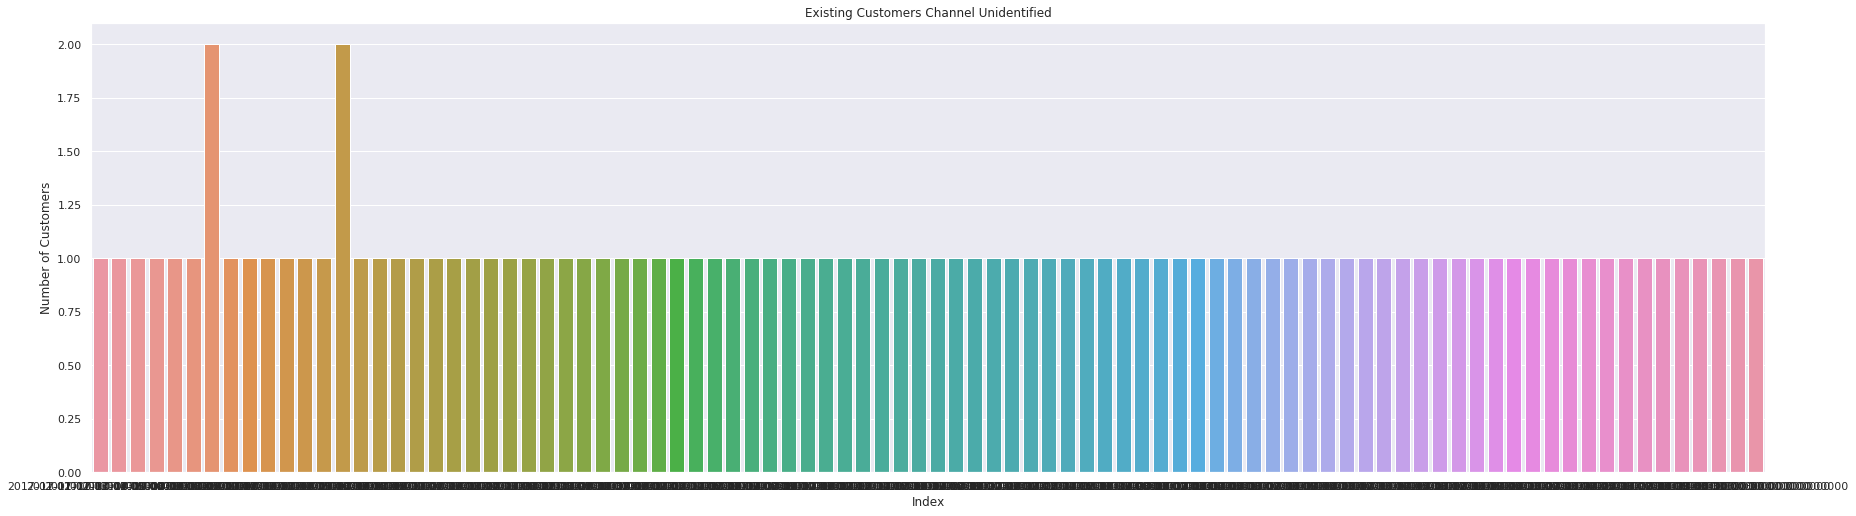

In [252]:
cnt = counts['Date'].value_counts()
sns.set(rc={'figure.figsize':(30,8.27)})
sns.set(style="darkgrid")
sns.barplot(cnt.index, cnt.values, alpha=1)
plt.title('Existing Customers Channel Unidentified')
plt.ylabel('Number of Customers', fontsize=12)
plt.xlabel('Index', fontsize=12)
plt.show()


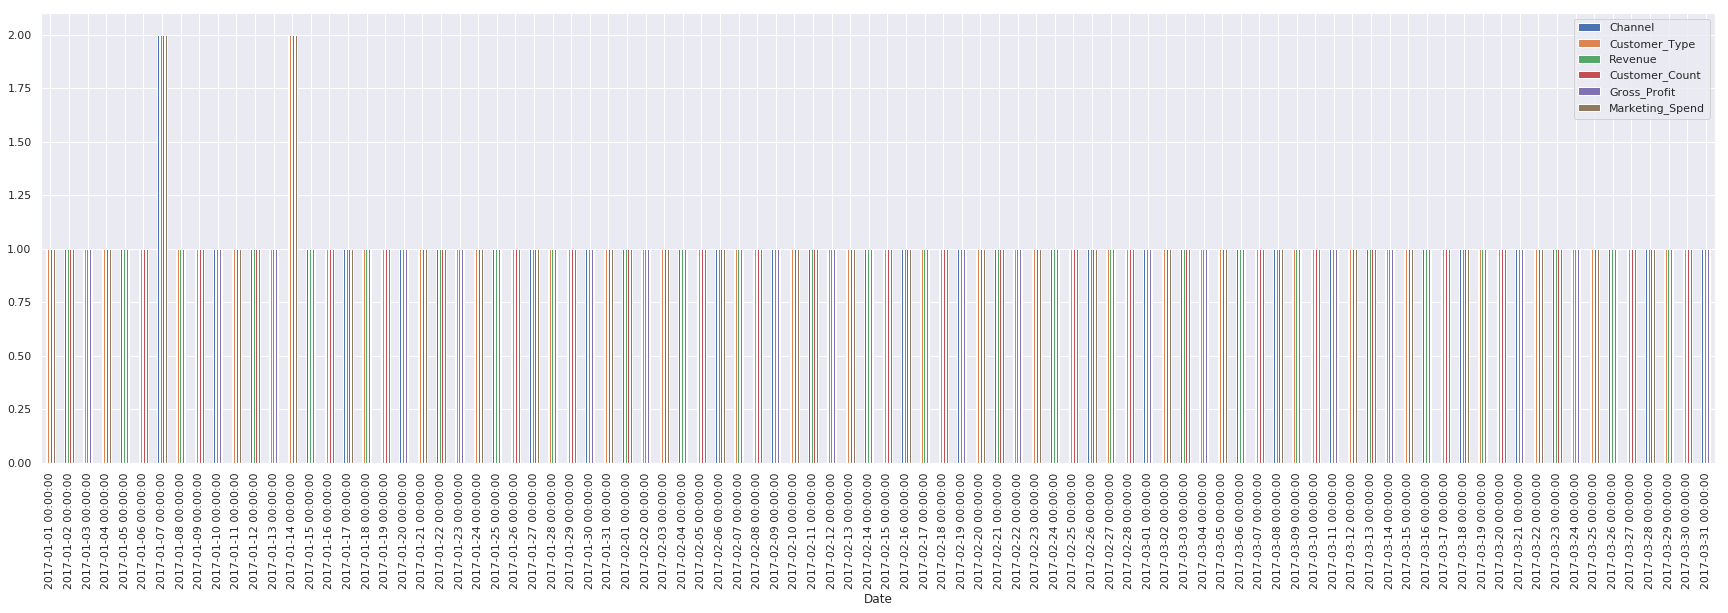

In [253]:
counts.groupby(counts["Date"]).count().plot(kind="bar")

#### What is the total spend amount and daily average spend on these existing customers?


In [254]:
#Total Spend Amount
counts['Marketing_Spend'].sum()

330185.78

In [255]:
#Daily Average Spend
counts['Marketing_Spend'].sum()/counts.shape[0]

3588.9758695652176

### Q3. We believe that the Brand channel drives more New Customers than Existing Customers. We would like to verify this statement using the data provided. Please provide the daily difference between Brand channel’s New Customers and Existing Customers using a visualization. Are there any insights from the visualization?


In [0]:
brand_data = data.loc[(data['Channel'] == "Brand")]

In [257]:
brand_data['Customer_Type'].value_counts()

NEW         82
EXISTING    81
Name: Customer_Type, dtype: int64

In [258]:
brand_data.groupby(['Date','Customer_Type']).size()

Date        Customer_Type
2017-01-01  EXISTING         1
            NEW              1
2017-01-02  EXISTING         1
            NEW              1
2017-01-03  EXISTING         1
            NEW              1
2017-01-04  NEW              1
2017-01-05  EXISTING         1
            NEW              1
2017-01-06  EXISTING         1
            NEW              1
2017-01-07  EXISTING         1
            NEW              1
2017-01-08  EXISTING         1
            NEW              1
2017-01-09  EXISTING         1
2017-01-10  NEW              1
2017-01-12  EXISTING         1
            NEW              1
2017-01-13  EXISTING         1
2017-01-14  EXISTING         1
            NEW              1
2017-01-15  NEW              1
2017-01-16  EXISTING         1
            NEW              1
2017-01-17  EXISTING         1
            NEW              1
2017-01-18  EXISTING         1
            NEW              1
2017-01-19  EXISTING         1
                            ..
2017-03-17  E

From the visualization it shows that Brand channel drives nearly equal number of new and existing customers. There are few days when only Existing customers appear from the channel and there are few days when New customers appear from the channel

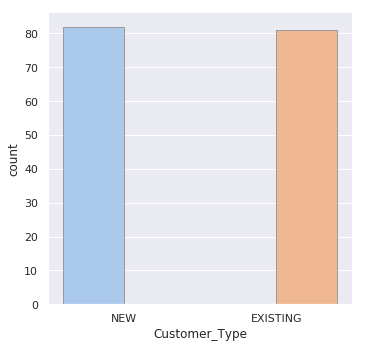

In [259]:
sns.catplot(x="Customer_Type", hue="Customer_Type", kind="count",
            palette="pastel", edgecolor=".6",
            data=brand_data);


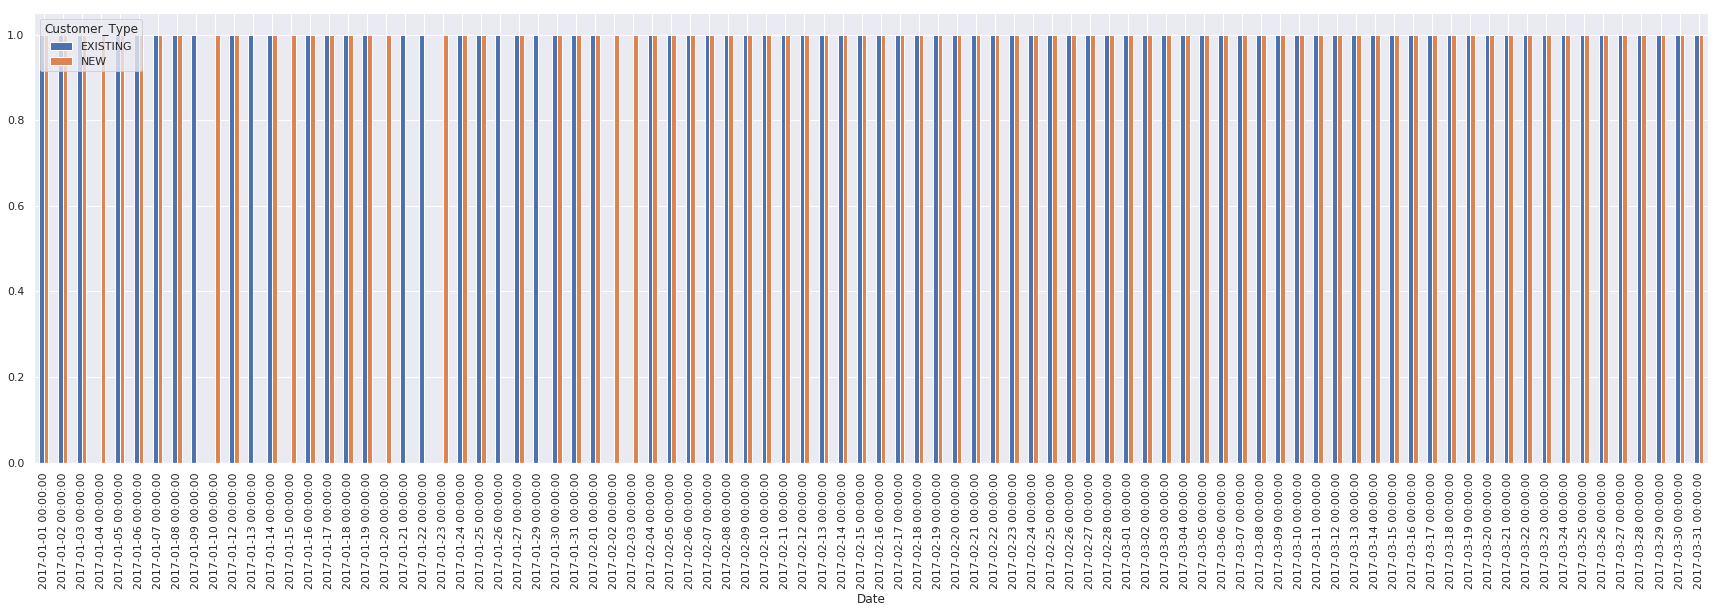

In [260]:
(brand_data
 .groupby(['Date', 'Customer_Type'])
 .size()
 .unstack()
 .plot.bar()
)

### Q4. Please calculate ‘Marketing_Contribution’ using formula: Marketing_Contribution = Gross_Profit - Marketing_Spend. Make a plot of the daily Marketing_Contribution at the aggerated level (for all channels and customer types together)


In [0]:
Marketing_Contribution = data['Gross_Profit'] - data['Marketing_Spend']


In [0]:
data['Marketing_Contribution'] = data['Gross_Profit']-data['Marketing_Spend']

In [263]:
data.head()

,Date,Channel,Customer_Type,Revenue,Customer_Count,Gross_Profit,Marketing_Spend,Marketing_Contribution
0,2017-01-01,Organic Social,NEW,2802.44,22.0,700.84,201.79,499.05
1,2017-01-01,Organic Social,EXISTING,3471.09,25.0,1110.40,249.75,860.65
2,2017-01-01,Brand,NEW,81.45,2.0,29.87,717.99,-688.12
3,2017-01-01,Unidentified,NEW,15465.99,80.0,5291.55,738.66,4552.89
4,2017-01-01,Brand,EXISTING,180.46,3.0,51.48,1595.63,-1544.15


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


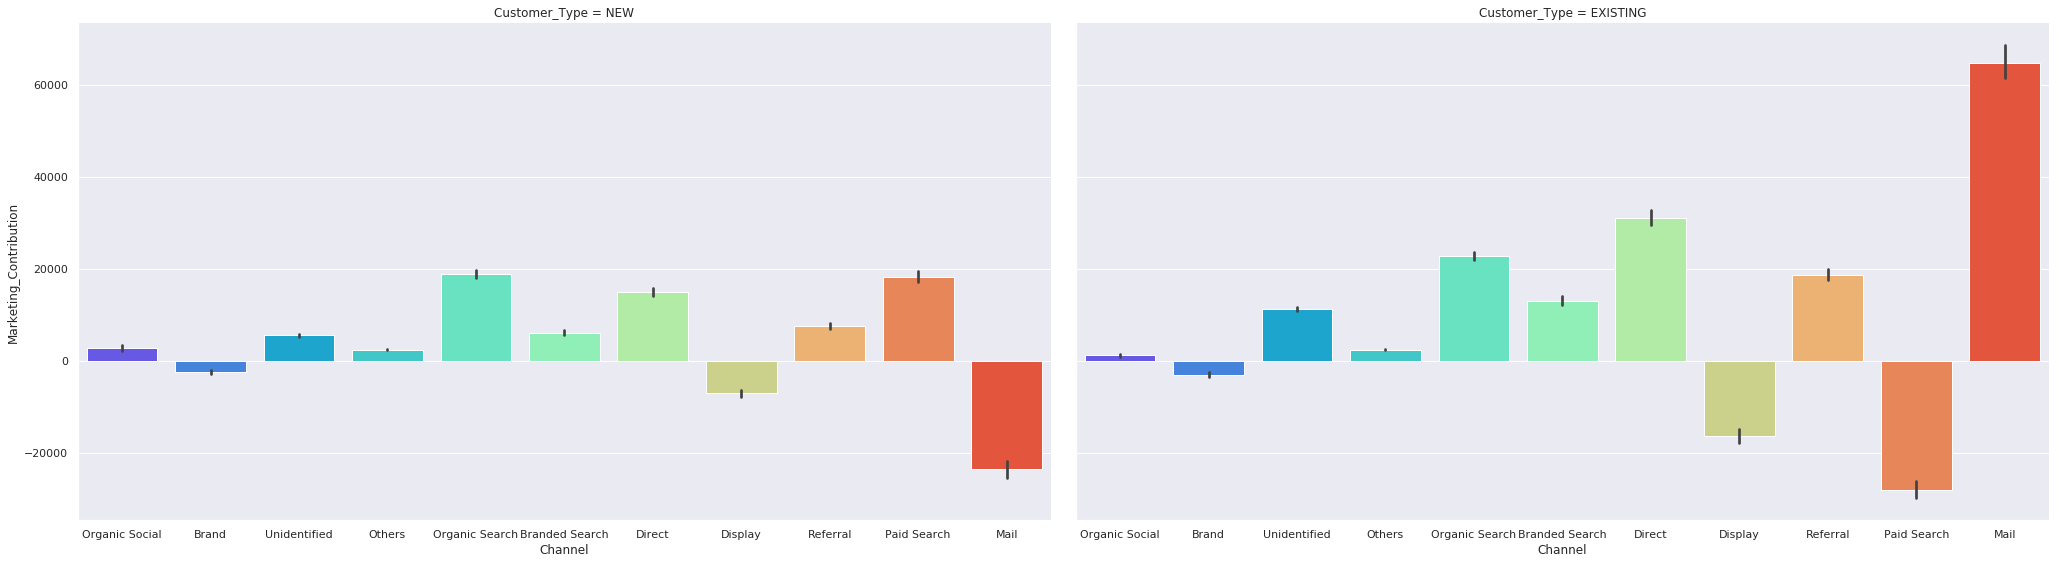

In [264]:
g = sns.FacetGrid(data, col="Customer_Type", height=8, aspect=1.8)
g.map(sns.barplot, "Channel", "Marketing_Contribution", palette='rainbow');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


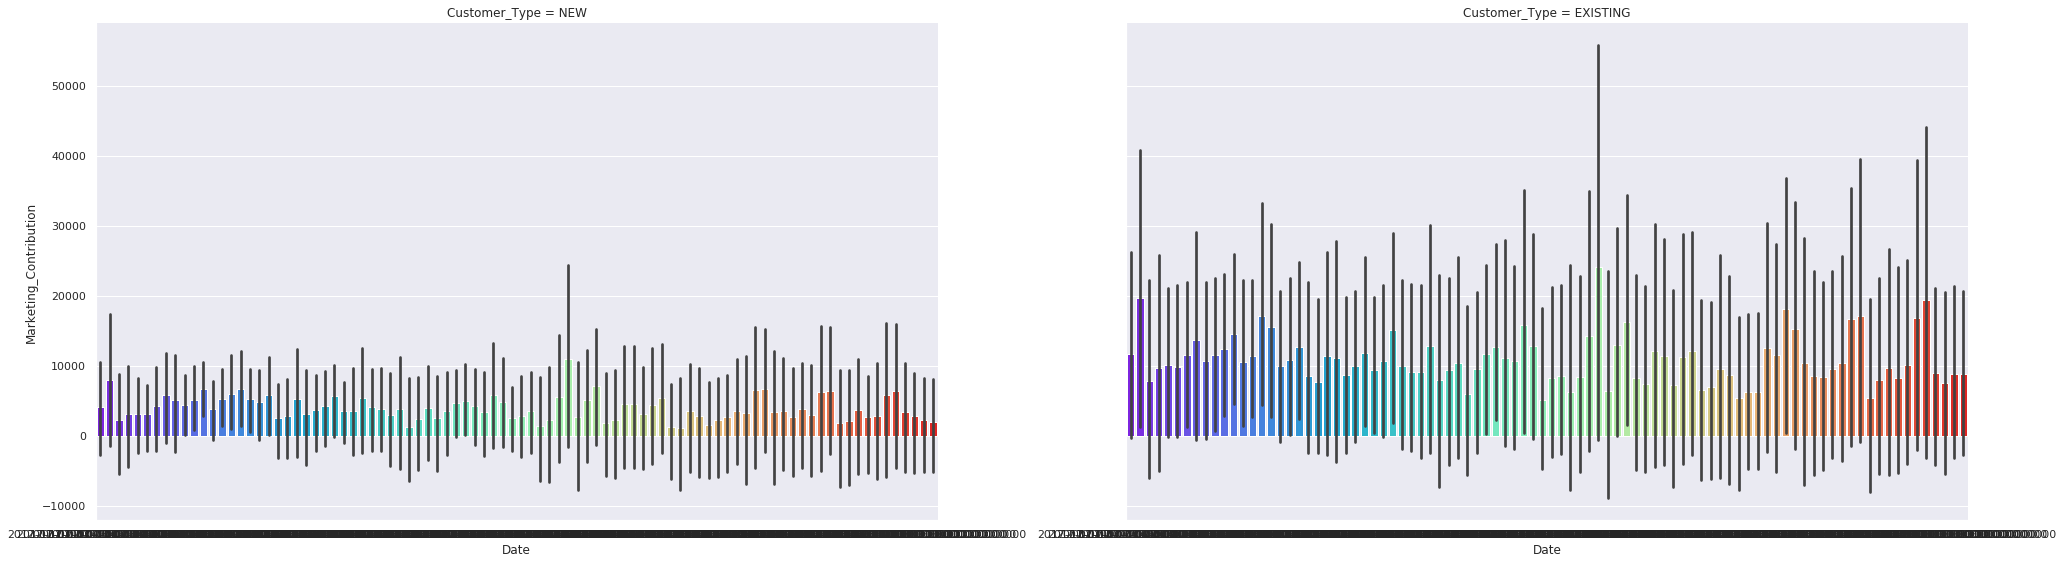

In [265]:
g = sns.FacetGrid(data, col="Customer_Type", height=8, aspect=1.8)
g.map(sns.barplot, "Date", "Marketing_Contribution", palette='rainbow');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


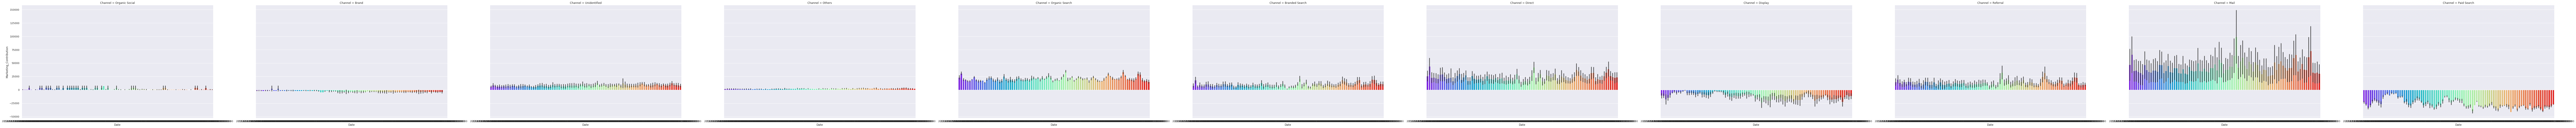

In [266]:
g = sns.FacetGrid(data, col="Channel", height=8, aspect=1.8)
g.map(sns.barplot, "Date", "Marketing_Contribution", palette='rainbow');

### Q5. Find correlation between Paid Search Revenue and Organic Search Revenue - as a calculation as well as a plot. 



From the plots it looks like on a particular day if Paid Search Revenue increases, Organic Search Revenue also increases
The total revenue generated from Paid Search is greater than that of Organic Search Channel

In [0]:
channel_data = data.loc[(data["Channel"] == 'Paid Search') | (data["Channel"] == 'Organic Search')]

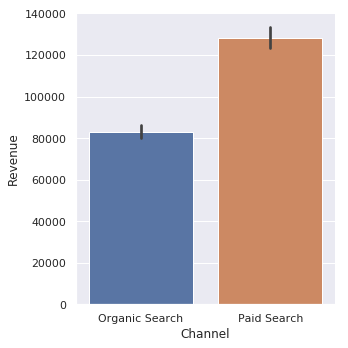

In [268]:
sns.catplot(x="Channel", y="Revenue", kind="bar", data=channel_data);

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


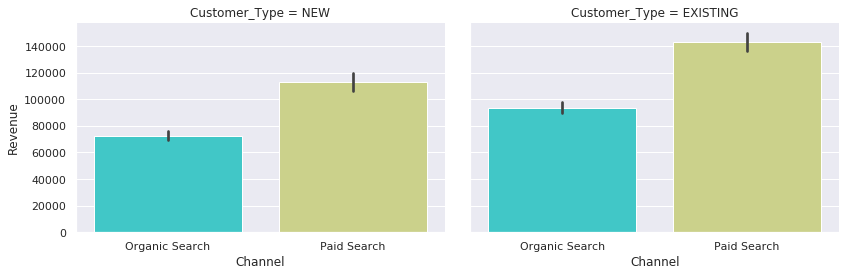

In [272]:
g = sns.FacetGrid(channel_data, col="Customer_Type", height=4, aspect=1.5)
g.map(sns.barplot, "Channel", "Revenue", palette='rainbow');

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


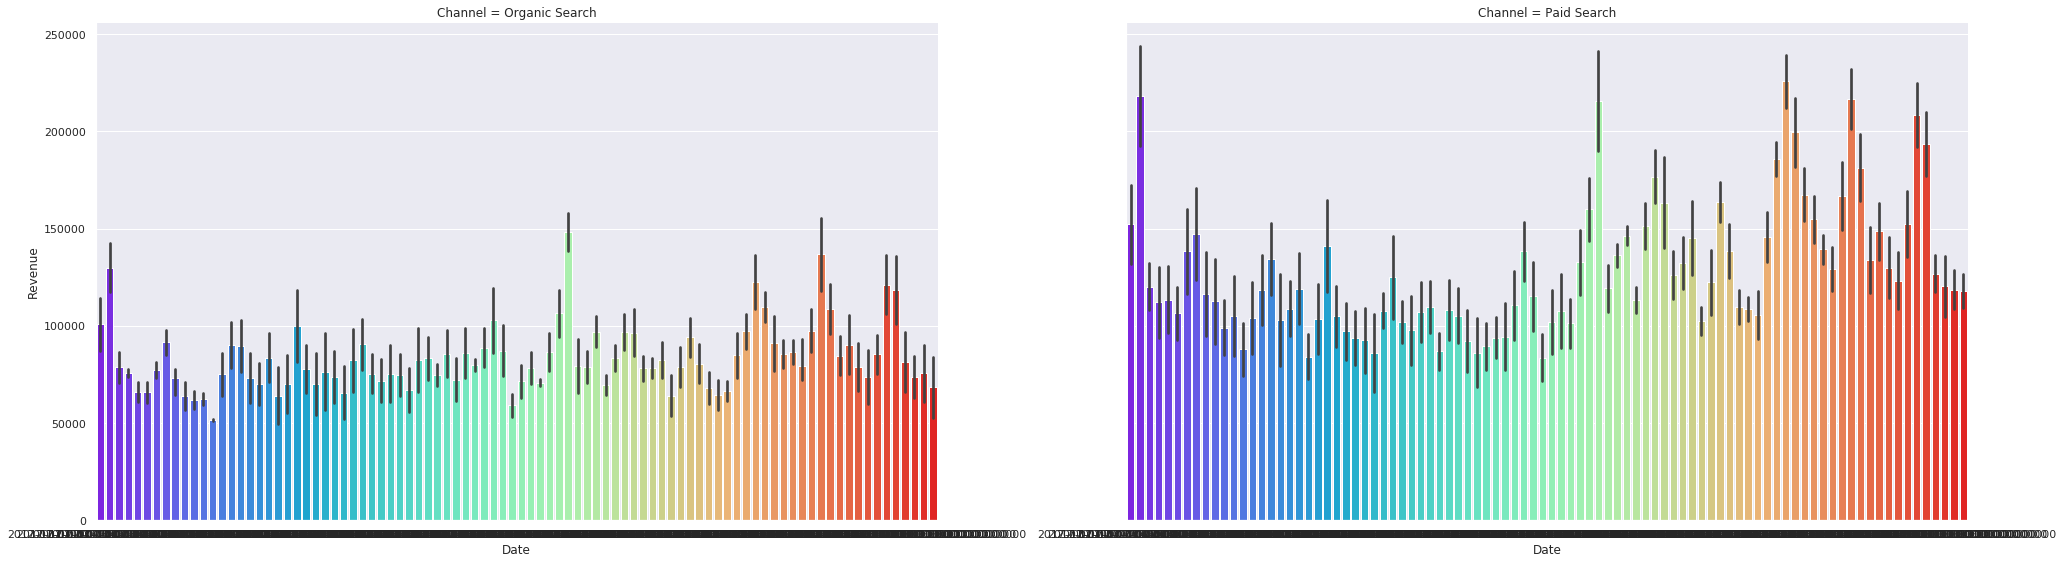

In [274]:
g = sns.FacetGrid(channel_data, col="Channel", height=8, aspect=1.8)
g.map(sns.barplot, "Date", "Revenue", palette='rainbow');